<a href="https://colab.research.google.com/github/akram1903/machine-learning-projects/blob/intro-to-pytorch/pytorchIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np


In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 18554333.44it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 339157.56it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6157526.62it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5519498.21it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

print('train data shape = ',training_data.data.shape)
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

print('test data shape = ',test_data.data.shape)


train data shape =  torch.Size([60000, 28, 28])
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
test data shape =  torch.Size([10000, 28, 28])


In [ ]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)

        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.786188  [   64/60000]
loss: 0.875540  [ 6464/60000]
loss: 0.638570  [12864/60000]
loss: 0.853538  [19264/60000]
loss: 0.752215  [25664/60000]
loss: 0.738665  [32064/60000]
loss: 0.826837  [38464/60000]
loss: 0.811494  [44864/60000]
loss: 0.807241  [51264/60000]
loss: 0.777275  [57664/60000]
Test Error: 
 Accuracy: 71.9%, Avg loss: 0.766590 

Epoch 2
-------------------------------
loss: 0.747075  [   64/60000]
loss: 0.844390  [ 6464/60000]
loss: 0.605537  [12864/60000]
loss: 0.828397  [19264/60000]
loss: 0.731881  [25664/60000]
loss: 0.712881  [32064/60000]
loss: 0.800309  [38464/60000]
loss: 0.793769  [44864/60000]
loss: 0.785449  [51264/60000]
loss: 0.755499  [57664/60000]
Test Error: 
 Accuracy: 73.0%, Avg loss: 0.744009 

Epoch 3
-------------------------------
loss: 0.713551  [   64/60000]
loss: 0.816562  [ 6464/60000]
loss: 0.577626  [12864/60000]
loss: 0.807299  [19264/60000]
loss: 0.714669  [25664/60000]
loss: 0.691709  [32064/600

### **note:** the above code ran 3 times (15 epochs)

# saving the model

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# Loading the model

In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    percentages = pred[0]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
    print(f'Percentage = {percentages}')

Predicted: "Ankle boot", Actual: "Ankle boot"
Percentage = tensor([-4.0366, -5.4014, -3.4216, -2.9392, -2.1685,  5.8669, -2.8689,  5.6023,
         2.7339,  6.2821])


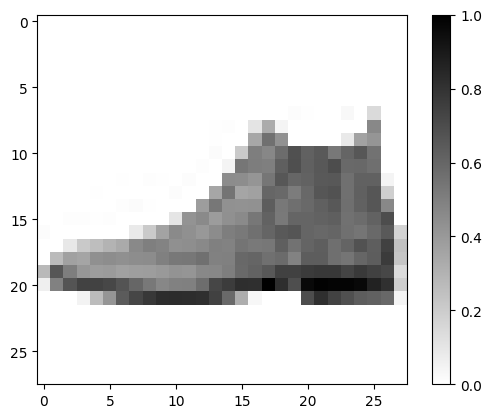

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(test_data[0][0][0],cmap='binary')
plt.colorbar()
plt.show()


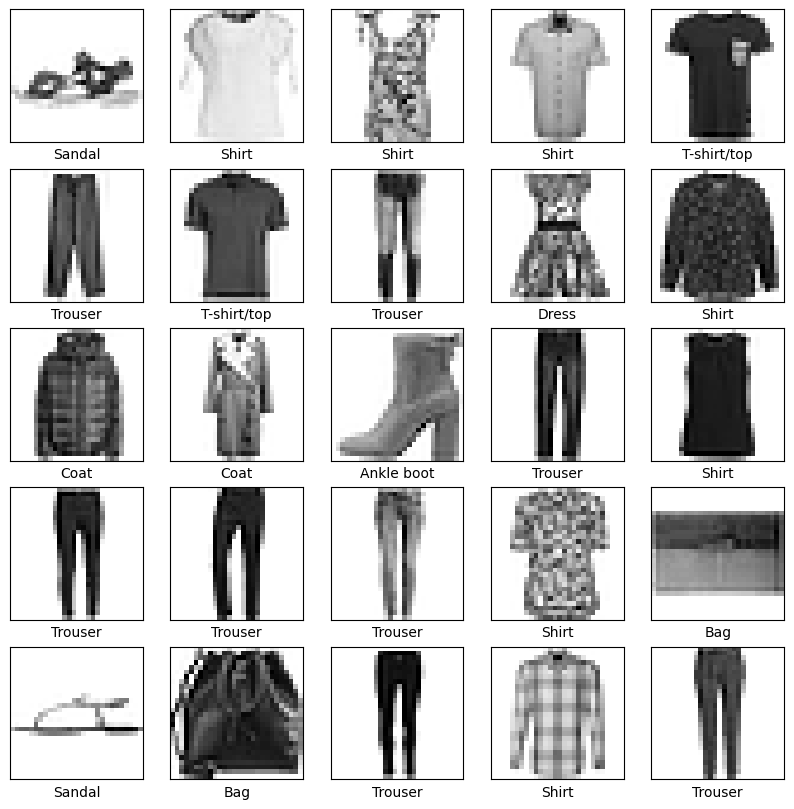

In [ ]:
import random
randomIndices = random.choices(range(10000),k=25)
plt.figure(figsize=(10,10))
index = 0
for i in randomIndices:
# test_data[0][0], test_data[0][1]
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_data[i][0][0], cmap=plt.cm.binary)
    plt.xlabel(classes[test_data[i][1]])
    index += 1
plt.show()

In [ ]:
def plot_image(test_sample, prediction, true_label):
  # true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(test_sample, cmap=plt.cm.binary)

  if prediction == true_label:
    color = 'blue'
    plt.xlabel("{}".format(prediction,
                                true_label),
                                color=color)

  else:
    color = 'red'
    plt.xlabel("{} Label: ({})".format(prediction,
                                    true_label),
                                    color=color)

  # print(f'prediction: {prediction}, label: {true_label}')





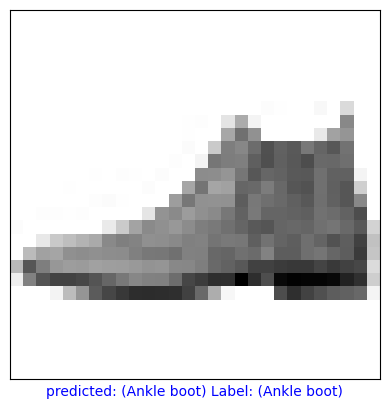

In [ ]:
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    # percentages = pred[0]
    # print(f'Predicted: "{predicted}", Actual: "{actual}"')
    # print(f'Percentage = {percentages}')
    plot_image(test_data[0][0][0],predicted,actual)

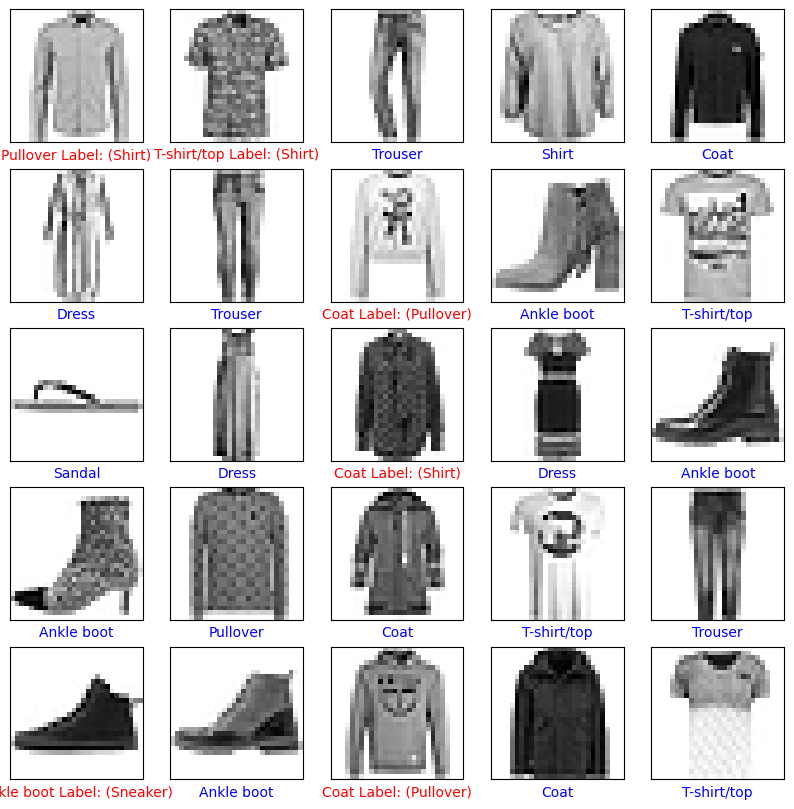

In [ ]:
import random
randomIndices = random.choices(range(10000),k=25)
plt.figure(figsize=(10,10))
index = 0
for i in randomIndices:
# test_data[0][0], test_data[0][1]
    plt.subplot(5,5,index+1)

    x, y = test_data[i][0], test_data[i][1]
    with torch.no_grad():
        x = x.to(device)
        pred = model(x)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        plot_image(test_data[i][0][0],predicted,actual)

    index += 1

plt.show()
